In [1]:
# 阶段二模块一作业
# 使用决策树算法对电力窃漏电数据集建模

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 导入数据集
dataset = pd.read_excel('./dataset.xls')
dataset

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0
...,...,...,...,...
286,4,1,2,0
287,1,0,2,0
288,5,1,2,1
289,2,1,0,0


## 数据划分 取30%做测试样本，剩下做训练样本

In [22]:
from sklearn.model_selection import train_test_split
# 划分训练集测试集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(dataset.iloc[:,:-1],dataset.iloc[:,-1],
                                             test_size = 0.3,random_state = 420)

In [5]:
Xtrain

,电量趋势下降指标,线损指标,告警类指标
91,3,0,0
237,3,1,1
274,2,1,1
20,3,0,1
97,1,0,2
...,...,...,...
185,2,1,0
115,1,1,1
287,1,0,2
63,0,0,2


## 使用CART决策树（分类树）进行建模

In [6]:
from sklearn.tree import DecisionTreeClassifier

-应先观察数据分布是否均匀

In [55]:
# 实例化决策树
clf = DecisionTreeClassifier(criterion='gini',class_weight='balanced')

In [56]:
# 训练模型
clf.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight='balanced')

In [57]:
# 训练集打分
clf.score(Xtrain,Ytrain)

0.8866995073891626

In [58]:
# 测试集打分
clf.score(Xtest,Ytest)

0.7613636363636364

## 生成混淆矩阵

In [10]:
from sklearn import metrics

In [59]:
# 混淆矩阵
metrics.confusion_matrix(Ytest,clf.predict(Xtest))

array([[62, 18],
       [ 3,  5]], dtype=int64)

## 计算预测准确率

In [60]:
# 计算accuracy (76+4) / (76+4+4+4)
metrics.accuracy_score(Ytest,clf.predict(Xtest))

0.7613636363636364

In [61]:
# 计算precision ？？？ 76/(76+4) 原因：可能是未定义0 1 正例 反例 对应关系 pos_label= 0/1
metrics.precision_score(Ytest,clf.predict(Xtest))

0.21739130434782608

In [62]:
metrics.precision_score(Ytest,clf.predict(Xtest),pos_label=0) # 更改正反例对应关系

0.9538461538461539

In [63]:
# 计算recall ？？？ 76 / (76+4)
metrics.recall_score(Ytest,clf.predict(Xtest))

0.625

In [64]:
metrics.f1_score(Ytest,clf.predict(Xtest))

0.3225806451612903

## 进行交叉验证

In [32]:
from sklearn.model_selection import cross_val_score

In [65]:
# 十折交叉验证
cross_val_score(clf,Xtrain,Ytrain,cv=10)

array([0.80952381, 0.85714286, 0.85714286, 0.95      , 0.85      ,
       0.85      , 0.9       , 0.85      , 1.        , 0.7       ])

In [66]:
# 交叉验证均值
cross_val_score(clf,Xtrain,Ytrain,cv=10).mean()

0.8623809523809524

## 画出ROC曲线

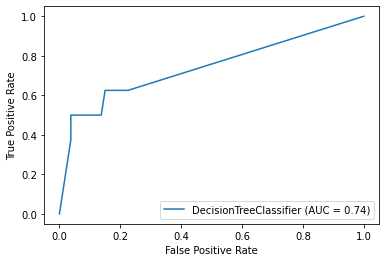

In [67]:
metrics.plot_roc_curve(clf,Xtest,Ytest)

0.000000 0.000000 2.000000
0.625000 0.225000 1.000000
1.000000 1.000000 0.000000


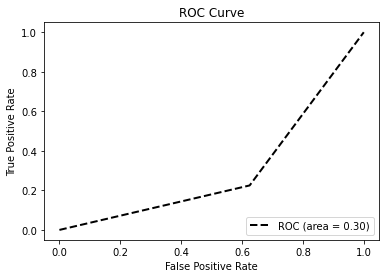

In [68]:
fpr, tpr, thersholds = metrics.roc_curve(Ytest,clf.predict(Xtest),pos_label=0) # 更换正反例对应
 
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))
 
roc_auc = metrics.auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [53]:
Ytrain.value_counts()

0    171
1     32
Name: 是否窃漏电, dtype: int64

In [54]:
Ytest.value_counts()

0    80
1     8
Name: 是否窃漏电, dtype: int64

In [ ]:
#样本分布不均匀